<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - New York

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de New York - USA, e ver quais insights podem ser extraídos a partir de dados brutos.**

###Celula teste

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in 
New York City (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/united-states/ny/new-york-city/2022-03-05/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://raw.githubusercontent.com/YuriQuisbert/DataBases/main/Airbnb_NY.csv) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 75281 entradas e 74 variáveis (`listings.csv.gz`).

Com isso em mente, vamos ao projeto.

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/YuriQuisbert/DataBases/main/Airbnb_NY.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Região em que a propriedade esta localizada 
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews nos últimos 12 meses (ltm - last twelve months)
* `license` - *esta coluna não possui nenhuma informação relevante*

Antes de iniciar qualquer transformação, vamos verificar a cara do nosso *dataset*: 

* analisando as 5 primeiras entradas.
* verificando a quantidade de entradas e variaveis disponiveis
* verificando o tipo de variável para cada coluna 

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.32,3,334,0,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.32,2,365,0,NaN
2,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,201,1,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,520,2022-02-18,3.33,1,154,46,NaN
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.77,1,0,0,NaN


In [ ]:
# identificar o volume de dados do DataFrame
print(f'''O dataset possui:
Entradas:\t {df.shape[0]}
Variaveis:\t {df.shape[1]}\n\n''')
# verificar as 5 primeiras entradas do dataset
df.dtypes

O dataset possui:
Entradas:	 37631
Variaveis:	 18




id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q1. Os atributos (variáveis) do nosso conjunto de dados estão corretos?**

Para a coluna `last_review` foi identificado que seu atributo *Object* está errado, uma vez que, as entradas dessa variável são do tipo *DateTime*.


In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `license` possui praticamente 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 25% do *dataset*.
* As variáveis `name` e `host_name` quase não possui valores nulos.
_____________________________________________________________________________
Para a análise, os seguintes procedimentos foram tomados:

* A coluna `license` foi eliminada
* Para as colunas `reviews_per_month` e `last_review`, foi verificado que o grande volume de dados ausentes se encontra no final da tabela, indicando que são locais que foram adicionados recentemente e ainda não possuem avaliações. Foi atribuido o valor *0* para esses campos.
* A ausencia de valores nas colunas `name` e `host_name` não interferem na análise.


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.999973
reviews_per_month                 0.238474
last_review                       0.238474
host_name                         0.002312
name                              0.000372
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [ ]:
df['license'].value_counts()

41662/AL    1
Name: license, dtype: int64

In [ ]:
df = df.drop(columns = ['license'])

In [ ]:
df['last_review']

0       2019-11-04
1       2019-12-02
2       2021-08-08
3       2022-02-18
4       2017-07-21
           ...    
37626          NaT
37627          NaT
37628          NaT
37629          NaT
37630          NaT
Name: last_review, Length: 37631, dtype: datetime64[ns]

In [ ]:
df = df.fillna({'reviews_per_month': 0, 'last_review': 0})

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

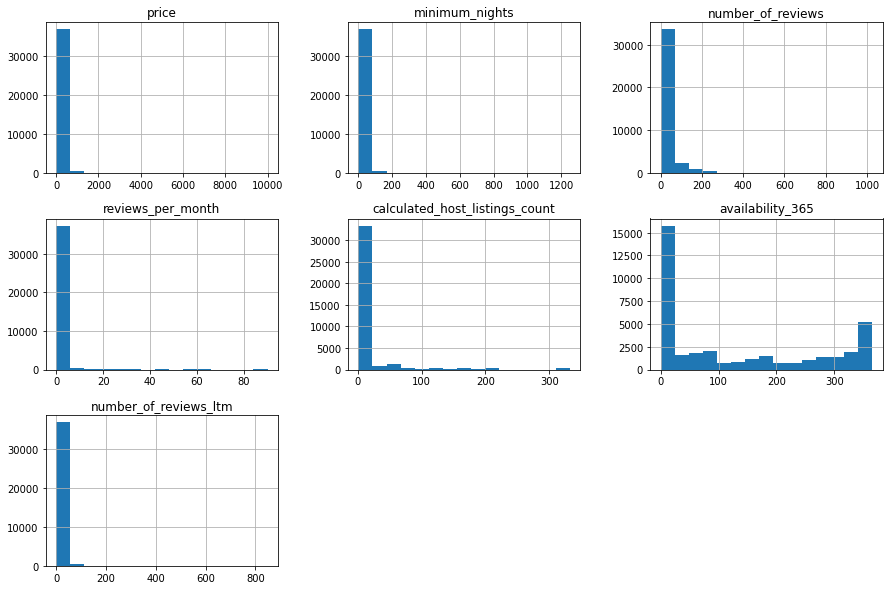

In [ ]:
df_number = df[['price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']]
# plotar o histograma das variáveis numéricas
df_number.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
df_number.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,37631.000000,37631.000000,37631.000000,37631.000000,37631.000000,37631.000000,37631.000000
mean,166.224682,20.496638,24.663044,0.798929,15.296723,129.085674,6.046743
std,306.763703,29.323780,52.871878,1.629484,46.246180,140.624717,16.838760
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,68.000000,2.000000,1.000000,0.010000,1.000000,0.000000,0.000000
50%,112.000000,30.000000,4.000000,0.200000,1.000000,66.000000,0.000000
75%,180.000000,30.000000,22.000000,1.000000,4.000000,275.000000,4.000000
max,10000.000000,1250.000000,1024.000000,90.000000,332.000000,365.000000,849.000000


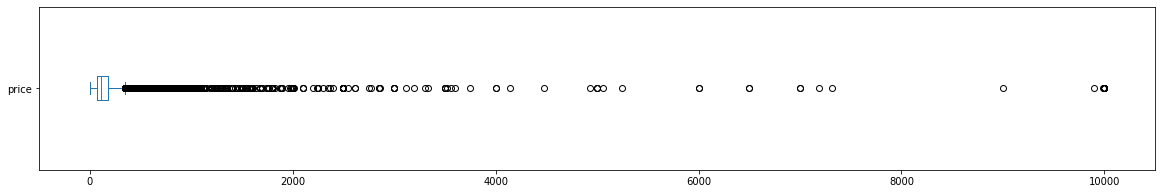

price: 
valores acima de 999: 
362 entradas 
0.9620%


In [ ]:
df['price'].plot(kind='box', vert=False, figsize=(20,3))
plt.show()

pc = 1

while (len(df[df.price > pc]) / df.shape[0])*100 > 1:
  pc = pc + 1

print(f'''price: 
valores acima de {pc}: 
{(len(df[df.price > pc]))} entradas 
{(len(df[df.price > pc]) / df.shape[0])*100:.4f}%''')

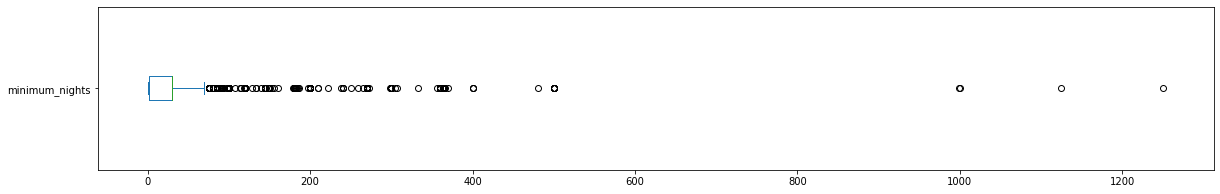

minimum_nights: 
valores acima de 90: 
359 entradas 
0.9540%


In [ ]:
df['minimum_nights'].plot(kind='box', vert=False, figsize=(20,3))
plt.show()

mn = 1

while (len(df[df.minimum_nights > mn]) / df.shape[0])*100 > 1:
  mn = mn + 1

print(f'''minimum_nights: 
valores acima de {mn}: 
{(len(df[df.minimum_nights > mn]))} entradas 
{(len(df[df.minimum_nights > mn]) / df.shape[0])*100:.4f}%''')

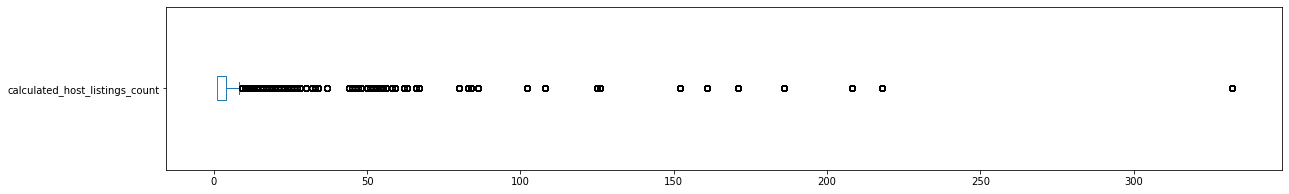

calculated_host_listings_count: 
valores acima de 218: 
332 entradas 
0.8823%


In [ ]:
df['calculated_host_listings_count'].plot(kind='box', vert=False, figsize=(20,3))
plt.show()

ch = 1

while (len(df[df.calculated_host_listings_count > ch]) / df.shape[0])*100 > 1:
  ch = ch + 1

print(f'''calculated_host_listings_count: 
valores acima de {ch}: 
{(len(df[df.calculated_host_listings_count > ch]))} entradas 
{(len(df[df.calculated_host_listings_count > ch]) / df.shape[0])*100:.4f}%''')

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`, vamos agora limpar o *DataFrame* delas, respeitando o limite atribuido de 1% do *DataFrame* para cada variável e plotar novamente o histograma.

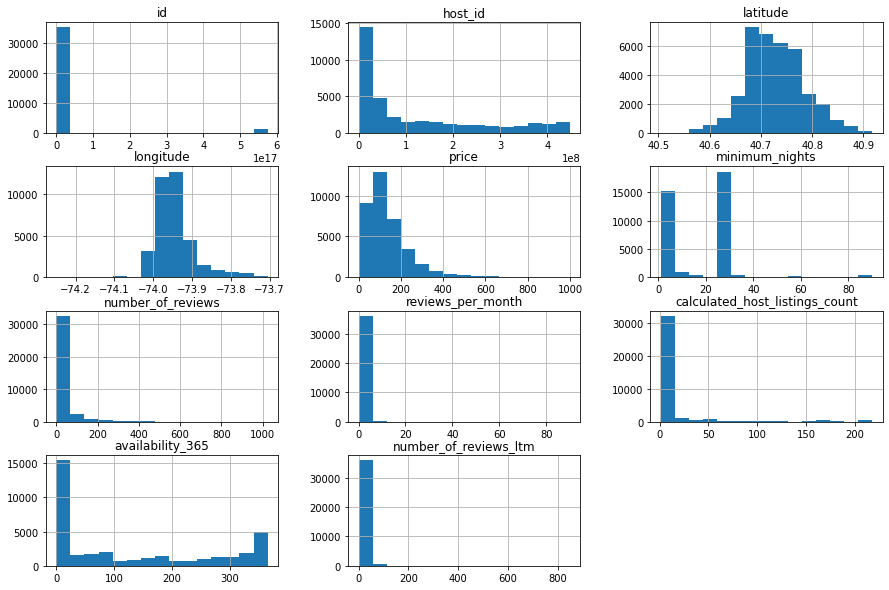

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > pc].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > mn].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > ch].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

#### Histogramas sem *outliers*

Dessa forma, foram Removidas 1043 entradas, que representam 2.77% do *DataFrame* original.



In [ ]:
print(df.shape)
print(df_clean.shape)
print(f'Foram removidas {df.shape[0] - df_clean.shape[0]} entradas,\nEquivalente a {(df.shape[0] - df_clean.shape[0]) / df.shape[0]*100:.2f}% ')


(37631, 17)
(36588, 17)
Foram removidas 1043 entradas,
Equivalente a 2.77% 


In [ ]:
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.658800e+04,3.658800e+04,36588.00000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000,36588.000000
mean,2.088019e+16,1.223045e+08,40.72835,-73.946097,144.705313,18.376326,25.173445,0.816670,12.436783,127.104242,6.193123
std,1.057453e+17,1.373353e+08,0.05682,0.053121,123.754892,15.677589,53.404591,1.646995,35.579400,139.909821,17.044104
min,2.595000e+03,2.438000e+03,40.50456,-74.249840,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.398279e+07,1.184195e+07,40.68811,-73.982430,67.000000,2.000000,1.000000,0.020000,1.000000,0.000000,0.000000
50%,3.346245e+07,5.150184e+07,40.72386,-73.953300,110.000000,30.000000,5.000000,0.220000,1.000000,63.000000,0.000000
75%,4.885700e+07,2.101367e+08,40.76220,-73.927028,175.000000,30.000000,22.000000,1.010000,4.000000,271.000000,5.000000
max,5.751276e+17,4.477881e+08,40.91697,-73.705220,999.000000,90.000000,1024.000000,90.000000,218.000000,365.000000,849.000000


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.112616,-0.034688,-0.011077,-0.064240,0.071023,0.010744
minimum_nights,-0.112616,1.000000,-0.233781,-0.365276,0.198081,-0.172304,-0.342948
number_of_reviews,-0.034688,-0.233781,1.000000,0.588313,-0.106271,0.097773,0.601758
reviews_per_month,-0.011077,-0.365276,0.588313,1.000000,-0.041327,0.158432,0.839931
calculated_host_listings_count,-0.064240,0.198081,-0.106271,-0.041327,1.000000,0.167811,-0.033147
availability_365,0.071023,-0.172304,0.097773,0.158432,0.167811,1.000000,0.143785
number_of_reviews_ltm,0.010744,-0.342948,0.601758,0.839931,-0.033147,0.143785,1.000000


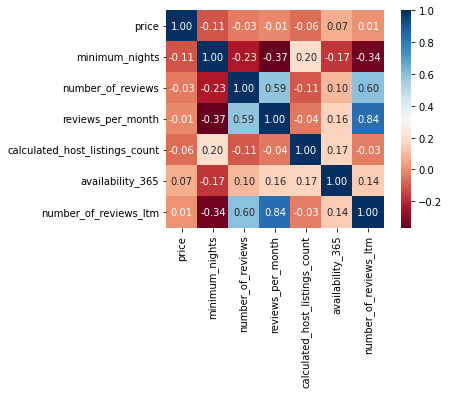

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
df_clean.room_type.value_counts()

Entire home/apt    19591
Private room       16255
Shared room          558
Hotel room           184
Name: room_type, dtype: int64

In [ ]:
df_clean.room_type.value_counts() / df_clean.shape[0] 

Entire home/apt    0.535449
Private room       0.444271
Shared room        0.015251
Hotel room         0.005029
Name: room_type, dtype: float64

Acima é possível perceber que, diferente do Brasil, é muito comum o aluguel de quartos privados, demonstrando a cultura de compartilhamento de casa, sendo responsável por quase 45% das locações.

### **Q6. Qual a localidade mais cara de New York?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os grupos de bairros (*neighbourhoods_group*) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

neighbourhood_group
Manhattan        180.123808
Brooklyn         127.296343
Staten Island    119.351515
Queens           102.846828
Bronx            100.259446
Name: price, dtype: float64

In [ ]:
print(df_clean[df_clean.neighbourhood_group == "Manhattan"].shape)

(15306, 17)


Como, para New York, houve um agrupamento de bairros, os outliers de cada bairro não afetaram a média de preço do grupo, de maneira que **Manhattan** teve a maior média, dentro de um espaço amostral relevante.

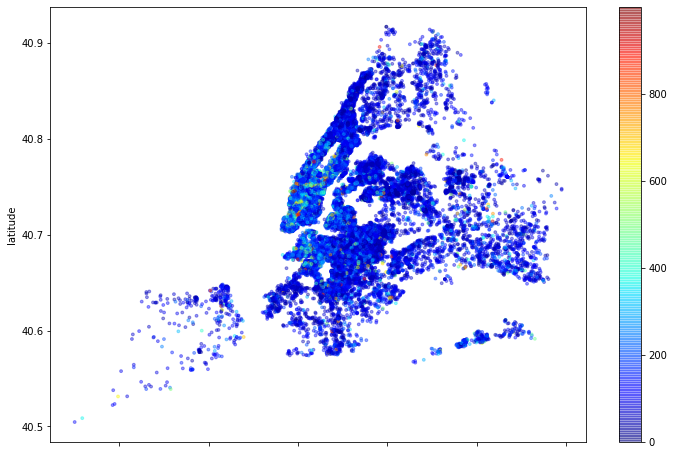

In [ ]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Em comparação com a análise feita para o Rio de Janeiro, alguns pontos podem ser levantados.

O principal deles é a cultura de locação de quartos privados em casas compartilhadas, algo muito comum nos EUA.

Outro ponto é o agrupamento de bairros por região, que evita qualquer tipo de conclusão equivocada sobre o preço médio de locação a partir de análises feitas com poucos dados.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.